In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import skew
from sklearn.metrics import SCORERS
from sklearn.metrics import f1_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from econml.metalearners import TLearner, SLearner, XLearner, DomainAdaptationLearner

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/dmachlanski/CE888_2022/main/project/data/jobs.csv')
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,t,y,e
0,-0.614282,1.464727,0.0,0.0,1.0,0.0,2.393250,2.746196,-0.653311,-0.656913,1.627531,2.462337,2.937244,0.0,0.0,2.843909,0.0,0.0,1.0,0.0
1,-0.802463,0.101835,0.0,0.0,1.0,0.0,0.109885,0.498271,-0.785284,-0.743407,-0.022502,-0.177193,0.082537,0.0,0.0,0.038422,0.0,0.0,1.0,0.0
2,-0.896553,-0.238888,1.0,0.0,1.0,1.0,-0.085212,-0.148097,-0.847312,-0.781606,-0.361348,-0.286221,-0.303615,0.0,0.0,-0.191304,0.0,0.0,1.0,0.0
3,-0.896553,-0.238888,0.0,0.0,0.0,1.0,0.405581,0.325594,-0.847312,-0.781606,-0.361348,0.023020,-0.039630,0.0,0.0,0.173108,0.0,0.0,1.0,1.0
4,0.138440,-1.601779,1.0,0.0,1.0,1.0,-0.722531,-0.212734,-0.019840,-0.156019,-1.422084,-0.514563,-0.331552,0.0,0.0,-0.779227,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207,1.737976,1.805449,0.0,0.0,1.0,0.0,4.235839,-1.110467,1.887171,1.995900,2.113702,6.424008,-0.518815,0.0,1.0,5.197260,0.0,0.0,0.0,0.0
3208,-0.520192,0.101835,0.0,0.0,0.0,0.0,0.239950,0.289997,-0.583365,-0.608340,-0.022502,-0.094318,-0.063091,0.0,0.0,0.143774,0.0,0.0,1.0,0.0
3209,-0.802463,0.442558,1.0,0.0,0.0,0.0,0.124337,0.692182,-0.785284,-0.743407,0.345809,-0.168387,0.236242,0.0,0.0,0.135970,0.0,0.0,1.0,0.0
3210,0.702982,0.101835,0.0,0.0,1.0,0.0,0.341112,0.670636,0.566120,0.413295,-0.022502,-0.024223,0.218301,0.0,0.0,0.225715,0.0,0.0,1.0,0.0


# Exploratory Data Analysis
In EDA We will Analyze :
1. Missing Values
2. Analysing Numerical and categorical features
3. Analysing outliers
4. Pearson Correlation
5.
6.

## 1.  Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3212 entries, 0 to 3211
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      3212 non-null   float64
 1   x2      3212 non-null   float64
 2   x3      3212 non-null   float64
 3   x4      3212 non-null   float64
 4   x5      3212 non-null   float64
 5   x6      3212 non-null   float64
 6   x7      3212 non-null   float64
 7   x8      3212 non-null   float64
 8   x9      3212 non-null   float64
 9   x10     3212 non-null   float64
 10  x11     3212 non-null   float64
 11  x12     3212 non-null   float64
 12  x13     3212 non-null   float64
 13  x14     3212 non-null   float64
 14  x15     3212 non-null   float64
 15  x16     3212 non-null   float64
 16  x17     3212 non-null   float64
 17  t       3212 non-null   float64
 18  y       3212 non-null   float64
 19  e       3212 non-null   float64
dtypes: float64(20)
memory usage: 502.0 KB


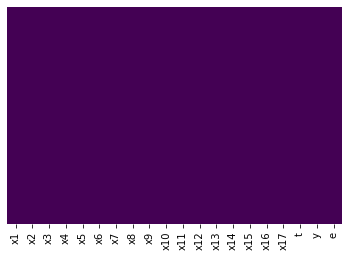

In [3]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df.info()

The  heatmap shows that there  are no null values in the dataset

#  2. Analyzing Numerical and Categorical Features

In [4]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  20


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,t,y,e
0,-0.614282,1.464727,0.0,0.0,1.0,0.0,2.393250,2.746196,-0.653311,-0.656913,1.627531,2.462337,2.937244,0.0,0.0,2.843909,0.0,0.0,1.0,0.0
1,-0.802463,0.101835,0.0,0.0,1.0,0.0,0.109885,0.498271,-0.785284,-0.743407,-0.022502,-0.177193,0.082537,0.0,0.0,0.038422,0.0,0.0,1.0,0.0
2,-0.896553,-0.238888,1.0,0.0,1.0,1.0,-0.085212,-0.148097,-0.847312,-0.781606,-0.361348,-0.286221,-0.303615,0.0,0.0,-0.191304,0.0,0.0,1.0,0.0
3,-0.896553,-0.238888,0.0,0.0,0.0,1.0,0.405581,0.325594,-0.847312,-0.781606,-0.361348,0.023020,-0.039630,0.0,0.0,0.173108,0.0,0.0,1.0,1.0
4,0.138440,-1.601779,1.0,0.0,1.0,1.0,-0.722531,-0.212734,-0.019840,-0.156019,-1.422084,-0.514563,-0.331552,0.0,0.0,-0.779227,0.0,0.0,1.0,0.0


There are no categorical features , all are numerical features

# 2A. ----> Discrete features in numerical features

In [5]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<20]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 12


array([[<AxesSubplot:title={'center':'x2'}>,
        <AxesSubplot:title={'center':'x3'}>,
        <AxesSubplot:title={'center':'x4'}>],
       [<AxesSubplot:title={'center':'x5'}>,
        <AxesSubplot:title={'center':'x6'}>,
        <AxesSubplot:title={'center':'x11'}>],
       [<AxesSubplot:title={'center':'x14'}>,
        <AxesSubplot:title={'center':'x15'}>,
        <AxesSubplot:title={'center':'x17'}>],
       [<AxesSubplot:title={'center':'t'}>,
        <AxesSubplot:title={'center':'y'}>,
        <AxesSubplot:title={'center':'e'}>]], dtype=object)

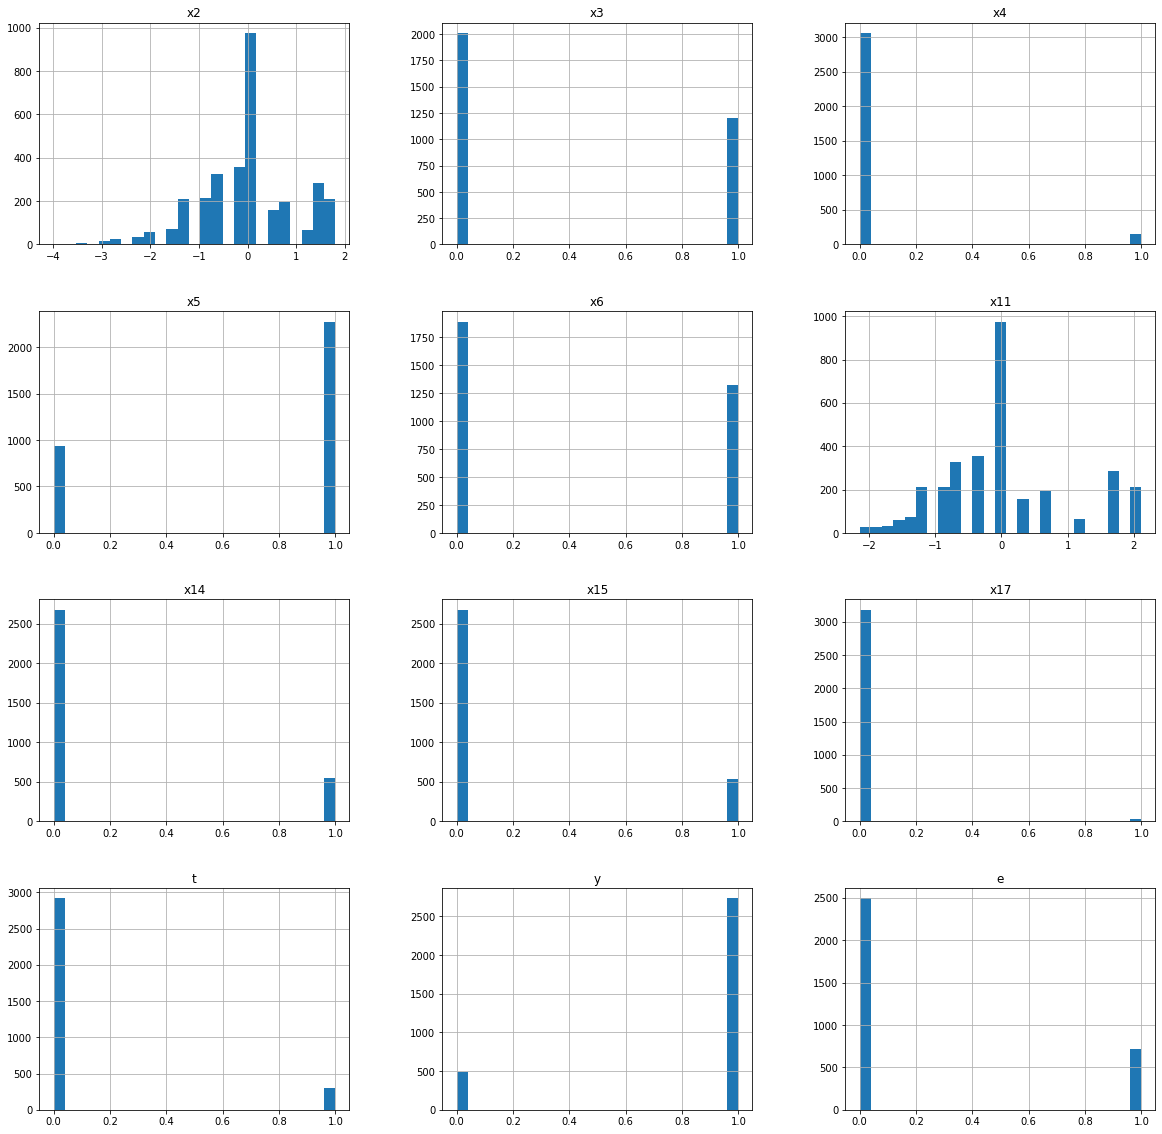

In [6]:
df[discrete_feature].hist(bins=25,figsize=(20,20))

# 2B. ----> Contineous features in numerical features

In [7]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 8


In [8]:
continuous_feature

['x1', 'x7', 'x8', 'x9', 'x10', 'x12', 'x13', 'x16']

x1  skew score ---->  0.5278670062888728
x7  skew score ---->  1.2782981824645818
x8  skew score ---->  1.4010324205177545
x9  skew score ---->  0.8771457784789412
x10  skew score ---->  1.1888850322250961
x12  skew score ---->  7.81849895316752
x13  skew score ---->  10.748240749313743
x16  skew score ---->  1.8639585002915344


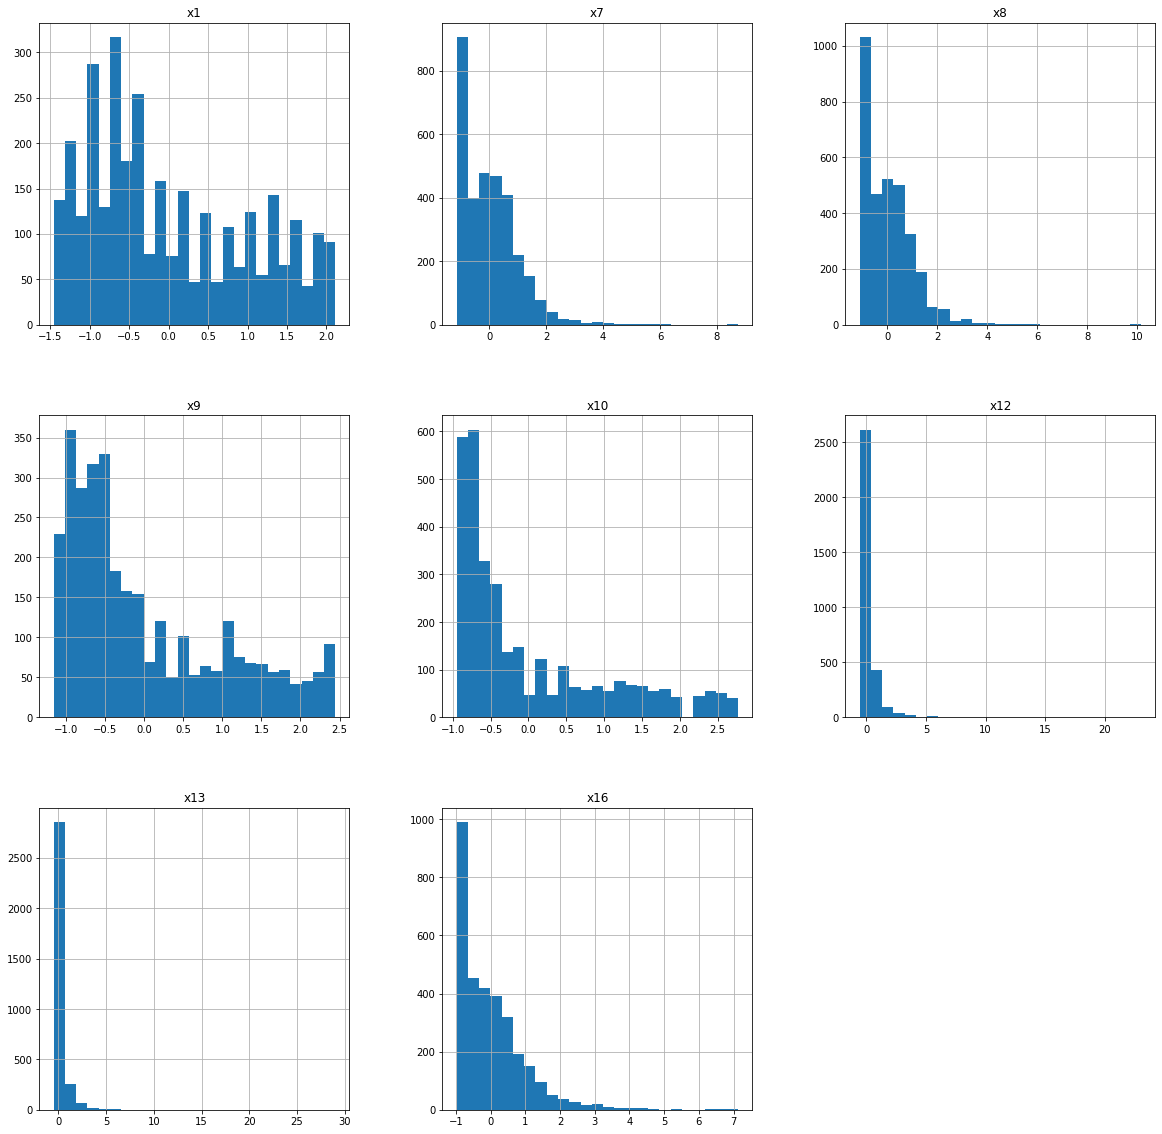

In [9]:
from functions import hist_skew_score
hist_skew_score(continuous_feature,df)

We are having right and left skewed features. Hence our dataset is skewed

# 3. Analysing outliers

<AxesSubplot:>

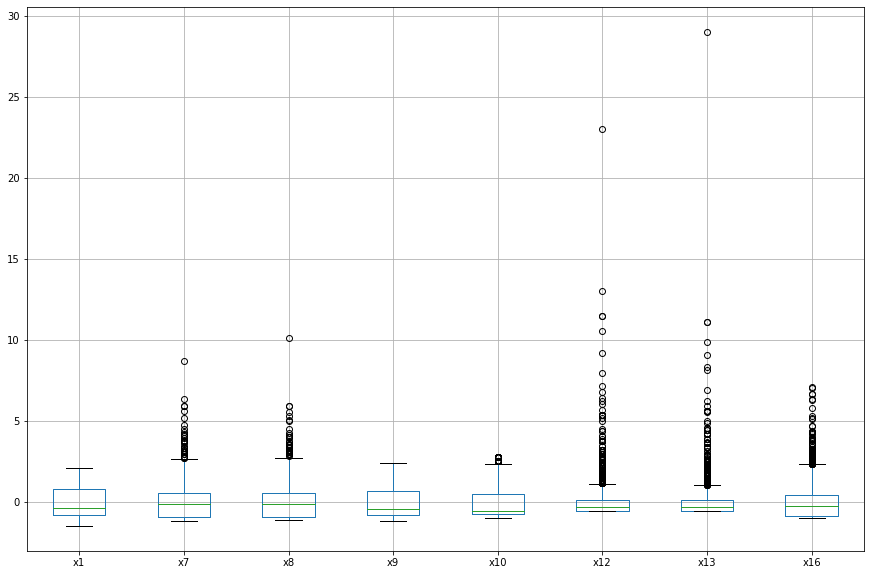

In [10]:
df.boxplot(column=continuous_feature,figsize=(15,10))

Except 'x1' and 'x9' all features have outliers

# 4. Pearson Correlation

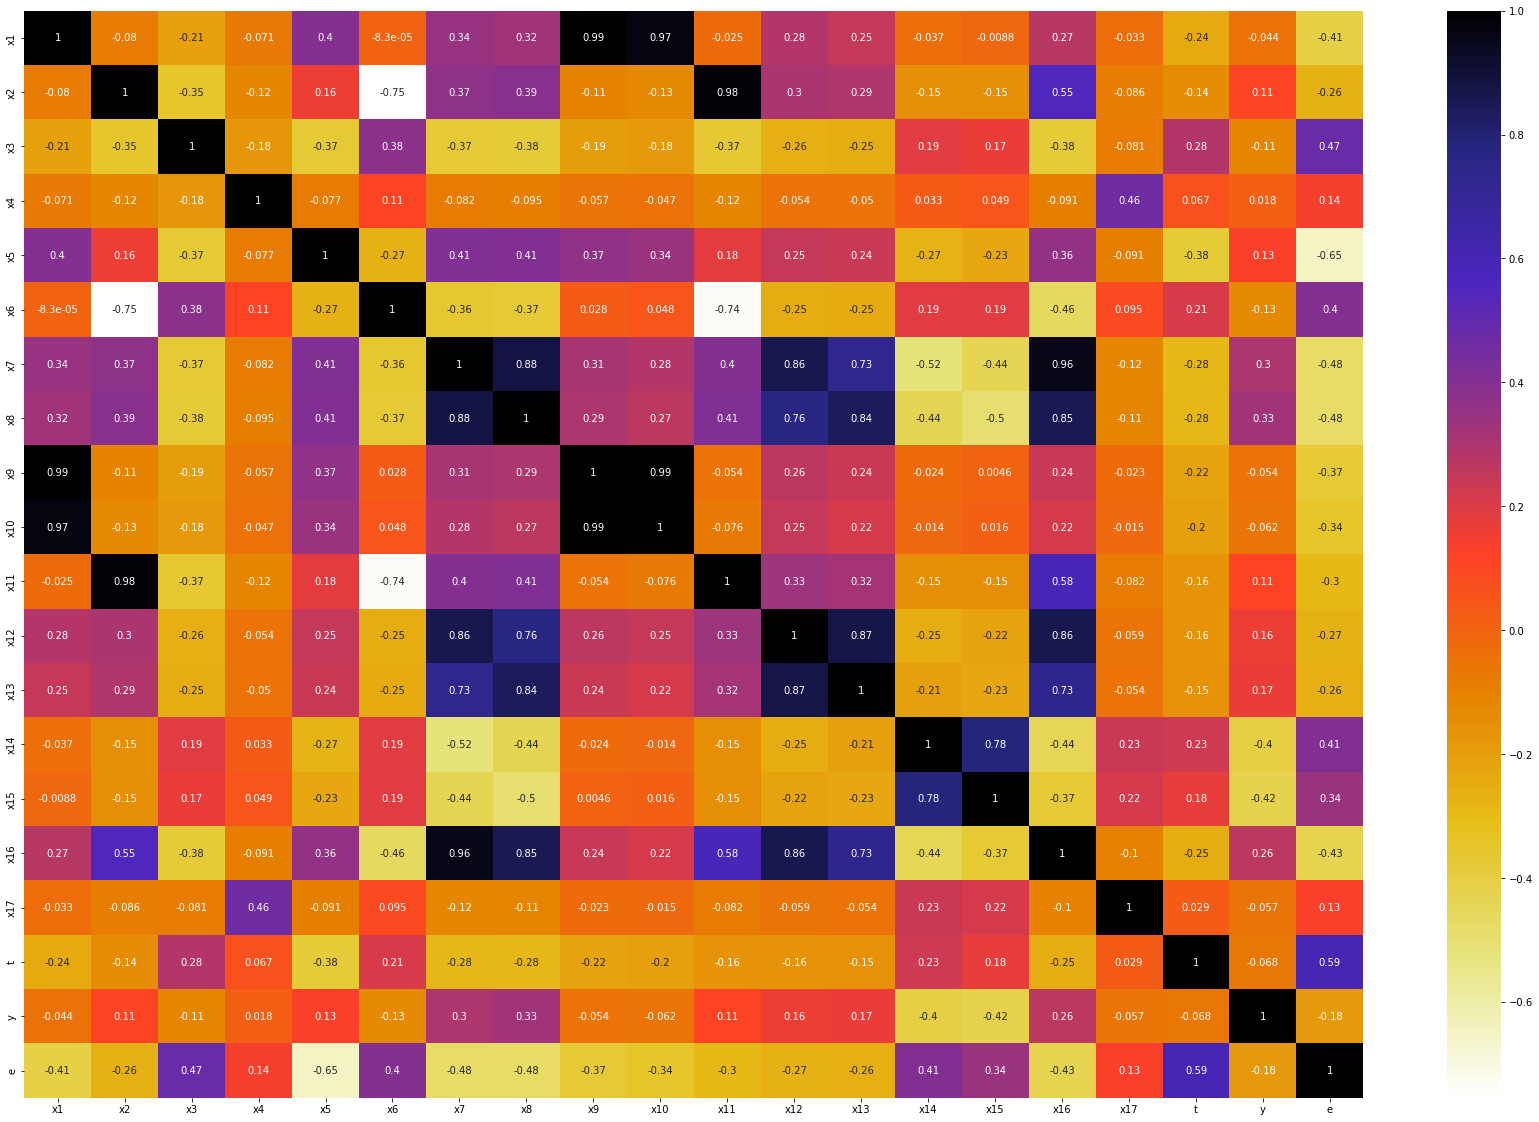

There are  7  highly correlated(>80%) features {'x13', 'x12', 'x8', 'x11', 'x16', 'x10', 'x9'}   in the dataset


In [11]:
plt.figure(figsize=(30,20))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()
from functions import correlation
correlation(df,0.8)
print('There are ', len(set(correlation(df,0.8))),' highly correlated(>80%) features',correlation(df,0.8),'  in the dataset')

'x7','x8' and 'x16' are highly correlated 

'x9' and 'x10' are highly correlated

'x11' and 'x2' are highly correlated

'x12' and 'x13' are highly correlated

# Checking imbalance in  dataset

1.0    2730
0.0     482
Name: y, dtype: int64 
 The dataset is highly imbalanced which need to be considered while modelling


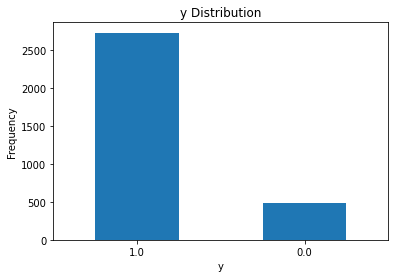

In [12]:


data =df.copy()
count_classes = pd.value_counts(data['y'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("y Distribution")

plt.xticks(range(2))

plt.xlabel("y")

plt.ylabel("Frequency")
data['y'].value_counts()
print(data['y'].value_counts(),'\n',"The dataset is highly imbalanced which need to be considered while modelling")

# Train Test Split

In [13]:
data = df.copy()
X = np.array(data.drop(['t','y','e'],axis=1))
Y = np.array(data['y']).reshape(-1,1)
T = np.array(data['t']).reshape(-1,1)

In [14]:
x_train, x_test, t_train, t_test, y_train, y_test,e_train,e_test = train_test_split(X, T, Y,data['e'],test_size=0.2, random_state=50, stratify= Y)

# Data Preprocessing

In [15]:
scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)

In [16]:
# for T = observered
xt_train = np.concatenate([x_train, t_train], axis=1) 
# for T=0
xt0_test = np.concatenate([x_test, np.zeros_like(t_test)], axis=1)
#for  T=1
xt1_test = np.concatenate([x_test, np.ones_like(t_test)], axis=1)

# Feature Importance

In [17]:
class OneHotEncoderCategoricalFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, cat_features):
        self.cat_features = cat_features
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return pd.get_dummies(X, columns=self.cat_features,drop_first=True)

In [18]:
# list of categorical variables
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
# list of numerical variables
num_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

colTransformer = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(), cat_features)
    ],
    remainder='passthrough'  # i.e., leave the rest of the columns untouched -- otherwise, they're dropped
    )

[12  7 15  9  0  6  8 11  1 10 17  4  2  5 14  3 13 16]
Feature ranking:
1. x13 (0.173818)
2. x8 (0.159052)
3. x16 (0.099419)
4. x10 (0.073382)
5. x1 (0.072112)
6. x7 (0.068632)
7. x9 (0.067976)
8. x12 (0.065228)
9. x2 (0.054213)
10. x11 (0.052345)
11. t (0.033562)
12. x5 (0.030563)
13. x3 (0.023923)
14. x6 (0.008401)
15. x15 (0.005404)
16. x4 (0.004971)
17. x14 (0.004434)
18. x17 (0.002565)


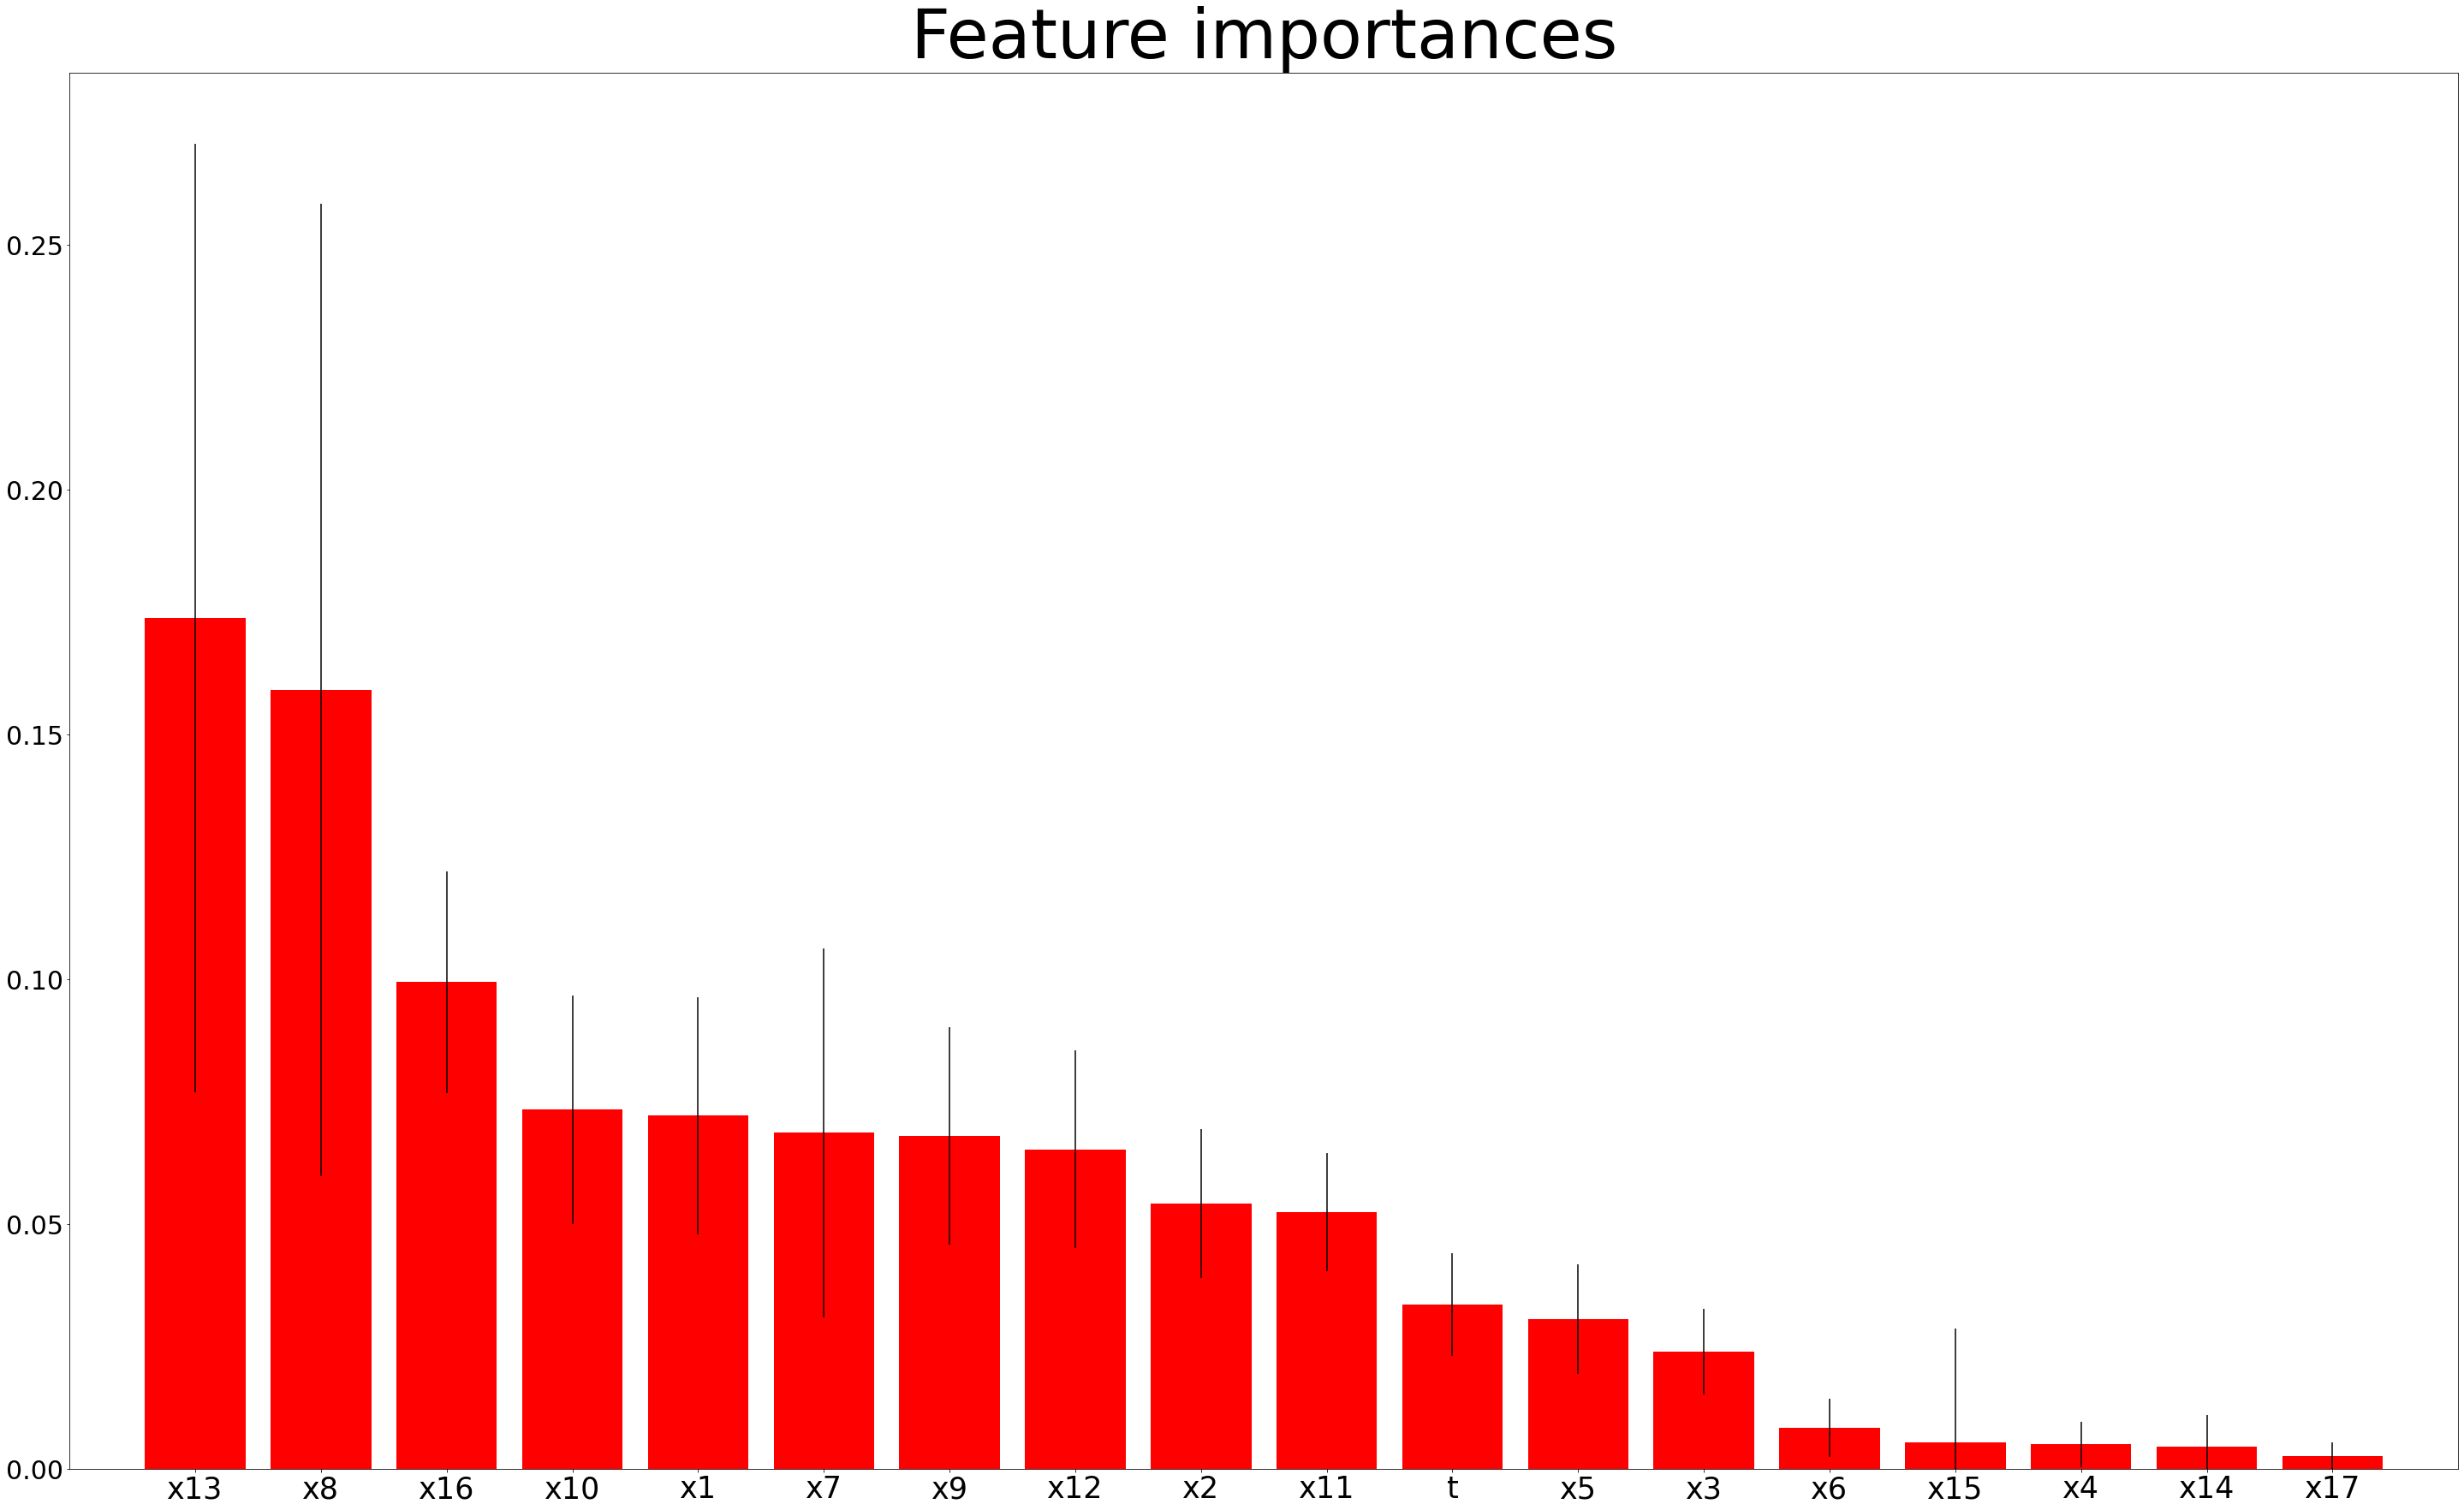

In [19]:
# Fit the model
clf = RandomForestRegressor()
clf.fit(xt_train, y_train.flatten())

# Let's see the feature importances for our classifier
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Let's get the attibute names:
feat_names = num_features

# Print the feature ranking
print("Feature ranking:")
for f in range(xt_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, feat_names[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances",fontsize = 80)
plt.bar(range(xt_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(xt_train.shape[1]), np.array(feat_names)[indices],fontsize=35)
plt.yticks(fontsize=30)
plt.xlim([-1, xt_train.shape[1]])
plt.ylim([0, None])

fig.set_size_inches(50, 30)

# Modelling

## 1. Regression Model

In [20]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1200, num = 24)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20, num = 20)]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth}

print(random_grid)

{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}


In [21]:
# Using the random grid to search for best hyperparameters
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions=random_grid, scoring=f1_score, n_iter = 10, cv = 10, verbose=2, random_state=50, n_jobs = 1)
rf_random.fit(xt_train, y_train.flatten())

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ......................max_depth=5, n_estimators=600; total time=   2.3s
[CV] END ......................max_depth=5, n_estimators=600; total time=   2.4s
[CV] END ......................max_depth=5, n_estimators=600; total time=   2.3s
[CV] END ......................max_depth=5, n_estimators=600; total time=   2.4s
[CV] END ......................max_depth=5, n_estimators=600; total time=   2.5s
[CV] END ......................max_depth=5, n_estimators=600; total time=   2.2s
[CV] END ......................max_depth=5, n_estimators=600; total time=   2.2s
[CV] END ......................max_depth=5, n_estimators=600; total time=   2.2s
[CV] END ......................max_depth=5, n_estimators=600; total time=   2.2s
[CV] END ......................max_depth=5, n_estimators=600; total time=   2.1s
[CV] END .....................max_depth=2, n_estimators=1150; total time=   2.3s
[CV] END .....................max_depth=2, n_e

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500, 550, 600, 650,
                                                         700, 750, 800, 850,
                                                         900, 950, 1000, 1050,
                                                         1100, 1150, 1200]},
                   random_state=50, scoring=<function f1_score at 0x129b390d0>,
                   verbose=2)

In [22]:
 rf_random.best_estimator_

RandomForestRegressor(max_depth=5, n_estimators=600)

In [23]:
rf = rf_random.best_estimator_
rf.fit(xt_train, y_train.flatten())

# Predicting Y_0 given [X, 0]
# Used np.zeros functions to get the zeros for all units.
# Merged X and zeros .
xt0_test = np.concatenate([x_test, np.zeros_like(t_test)], axis=1)# YOUR CODE HERE
rf_y0_test = rf.predict(xt0_test)

# Predict Y_1 given [X, 1]
# Used np.ones functions to get the ones for all units.
# Merged X and ones
xt1_test = np.concatenate([x_test, np.ones_like(t_test)], axis=1) # YOUR CODE HERE
rf_y1_test = rf.predict(xt1_test)

# Compute ITEs
# ITE = Y_1 - Y_0
rf_te_test = rf_y1_test - rf_y0_test

In [24]:
rf_te_test.shape,y_test.shape,t_test.shape,e_test.shape

In [25]:
from functions import policy_risk,change_to_1d,abs_att,abs_ate,pehe


y_test = change_to_1d(y_test)


t_test = change_to_1d(t_test)

# Error on ATT
# Using  'abs_att' to find absolute average treatment on treated
rf_att_test = abs_att(rf_te_test, y_test, t_test, e_test)

# Policy risk
# Using  'policy_risk' to find policy risk
rf_policy_test = policy_risk(rf_te_test, y_test, t_test, e_test)

results = []
results.append(['RF', rf_att_test,rf_policy_test])
cols = ['Method', 'ATT test','Policy Risk']

df = pd.DataFrame(results, columns=cols)
df

,Method,ATT test,Policy Risk
0,RF,0.022766,0.219107


# 2. Random Forest Classifier(IPW)

In [26]:
from functions import abs_ate,pehe,get_ps_weights
# Get the sample weights
prop_clf = RandomForestClassifier()
weights = get_ps_weights(prop_clf, x_train, t_train)

# Training the regressor
# Using the random grid to search for best hyperparameters
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations
rf_ipsw = RandomForestRegressor()
rf_ipsw_random = RandomizedSearchCV(estimator = rf, param_distributions=random_grid, scoring=f1_score, n_iter = 10, cv = 10, verbose=2, random_state=50, n_jobs = 1)
rf_ipsw_random.fit(xt_train, y_train.flatten(), sample_weight= weights )
#Rf withsample. weights and best parameter
rf_ipsw = rf_ipsw_random.best_estimator_
rf_ipsw.fit(xt_train, y_train.flatten(), sample_weight= weights )

# Make predictions
rf_ipsw_y0_test = rf_ipsw.predict(xt0_test)
rf_ipsw_y1_test = rf_ipsw.predict(xt1_test)

# Compute ITEs
rf_ipsw_te_test = rf_ipsw_y1_test - rf_ipsw_y0_test

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ......................max_depth=5, n_estimators=600; total time=   2.1s
[CV] END ......................max_depth=5, n_estimators=600; total time=   2.1s
[CV] END ......................max_depth=5, n_estimators=600; total time=   2.1s
[CV] END ......................max_depth=5, n_estimators=600; total time=   2.1s
[CV] END ......................max_depth=5, n_estimators=600; total time=   2.1s
[CV] END ......................max_depth=5, n_estimators=600; total time=   2.1s
[CV] END ......................max_depth=5, n_estimators=600; total time=   2.1s
[CV] END ......................max_depth=5, n_estimators=600; total time=   2.1s
[CV] END ......................max_depth=5, n_estimators=600; total time=   2.1s
[CV] END ......................max_depth=5, n_estimators=600; total time=   2.1s
[CV] END .....................max_depth=2, n_estimators=1150; total time=   2.2s
[CV] END .....................max_depth=2, n_e

# Evaluating RF after IPW

In [27]:
y_test = change_to_1d(y_test)


t_test = change_to_1d(t_test)

# Error on ATT
# Using  'abs_att' to find absolute average treatment on treated
rf_att_test = abs_att(rf_te_test, y_test, t_test, e_test)
rf_ipsw_att_test = abs_att(rf_ipsw_te_test, y_test, t_test, e_test)

# Policy risk
# Using  'policy_risk' to find policy risk
rf_policy_test = policy_risk(rf_te_test, y_test, t_test, e_test)
rf_ipsw_policy_test = policy_risk(rf_ipsw_te_test, y_test, t_test, e_test)

results = []
results.append(['RF', rf_att_test,rf_policy_test])
results.append(['RF (IPW)', rf_ipsw_att_test, rf_ipsw_policy_test])

cols = ['Method', 'ATT test','Policy Risk']

df = pd.DataFrame(results, columns=cols)
df


,Method,ATT test,Policy Risk
0,RF,0.022766,0.219107
1,RF (IPW),0.037439,0.164464


# CATE Estimator model

# X Learner 

In [28]:
# X-Learner
# Get the sample weights
clf_p = RandomForestClassifier()
clf_p_grid = RandomizedSearchCV(estimator = clf_p, param_distributions=random_grid, scoring=f1_score, n_iter = 10, cv = 10, verbose=2, random_state=50, n_jobs = 1)
clf_p_grid.fit(x_train, t_train)
prop_clf = clf_p_grid.best_estimator_
weights = get_ps_weights(prop_clf, x_train, t_train)



# Using the random grid to search for best hyperparameters
# Random search of parameters, using 10 fold cross validation, 
# search across 100 different combinations
clf = GradientBoostingRegressor()
clf_grid = RandomizedSearchCV(estimator = clf, param_distributions=random_grid, scoring=f1_score, n_iter = 10, cv = 10, verbose=2, random_state=50, n_jobs = 1)
clf_grid.fit(y_train, t_train.flatten())
xl = XLearner(models=clf_grid.best_estimator_, propensity_model=prop_clf)
xl.fit(y_train, t_train.flatten(), X=x_train)


xl_te_test = xl.effect(x_test)

s = []
for el in xl_te_test:
    s.append(float(el))
xl_te_test = np.array(s)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ......................max_depth=5, n_estimators=600; total time=   1.0s
[CV] END ......................max_depth=5, n_estimators=600; total time=   1.0s
[CV] END ......................max_depth=5, n_estimators=600; total time=   1.0s
[CV] END ......................max_depth=5, n_estimators=600; total time=   1.0s
[CV] END ......................max_depth=5, n_estimators=600; total time=   1.0s
[CV] END ......................max_depth=5, n_estimators=600; total time=   1.0s
[CV] END ......................max_depth=5, n_estimators=600; total time=   1.0s
[CV] END ......................max_depth=5, n_estimators=600; total time=   1.0s
[CV] END ......................max_depth=5, n_estimators=600; total time=   1.0s
[CV] END ......................max_depth=5, n_estimators=600; total time=   1.0s
[CV] END .....................max_depth=2, n_estimators=1150; total time=   1.5s
[CV] END .....................max_depth=2, n_e

[CV] END ......................max_depth=5, n_estimators=600; total time=   0.1s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.1s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.1s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.1s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.1s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.1s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.1s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.1s
[CV] END ......................max_depth=5, n_estimators=600; total time=   0.1s
[CV] END .....................max_depth=2, n_estimators=1150; total time=   0.2s
[CV] END .....................max_depth=2, n_estimators=1150; total time=   0.2s
[CV] END .....................max_depth=2, n_estimators=1150; total time=   0.2s
[CV] END ...................

In [29]:

y_test = change_to_1d(y_test)


t_test = change_to_1d(t_test)

# Error on ATT
# Using  'abs_att' to find absolute average treatment on treated
rf_att_test = abs_att(rf_te_test, y_test, t_test, e_test)
rf_ipsw_att_test = abs_att(rf_ipsw_te_test, y_test, t_test, e_test)
xl_att_test = abs_att(xl_te_test, y_test, t_test, e_test)

# Policy risk
# Using  'policy_risk' to find policy risk
rf_policy_test = policy_risk(rf_te_test, y_test, t_test, e_test)
rf_ipsw_policy_test = policy_risk(rf_ipsw_te_test, y_test, t_test, e_test)
xl_policy_test =  policy_risk(xl_te_test, y_test, t_test, e_test)

results = []
results.append(['RF', rf_att_test,rf_policy_test])
results.append(['RF (IPW)', rf_ipsw_att_test, rf_ipsw_policy_test])
results.append(['XL', xl_att_test, xl_policy_test])


cols = ['Method', 'ATT test','Policy Risk']

df = pd.DataFrame(results, columns=cols)
df

,Method,ATT test,Policy Risk
0,RF,0.022766,0.219107
1,RF (IPW),0.037439,0.164464
2,XL,0.012156,0.222843


# Scatter Plot of Treatment Effect

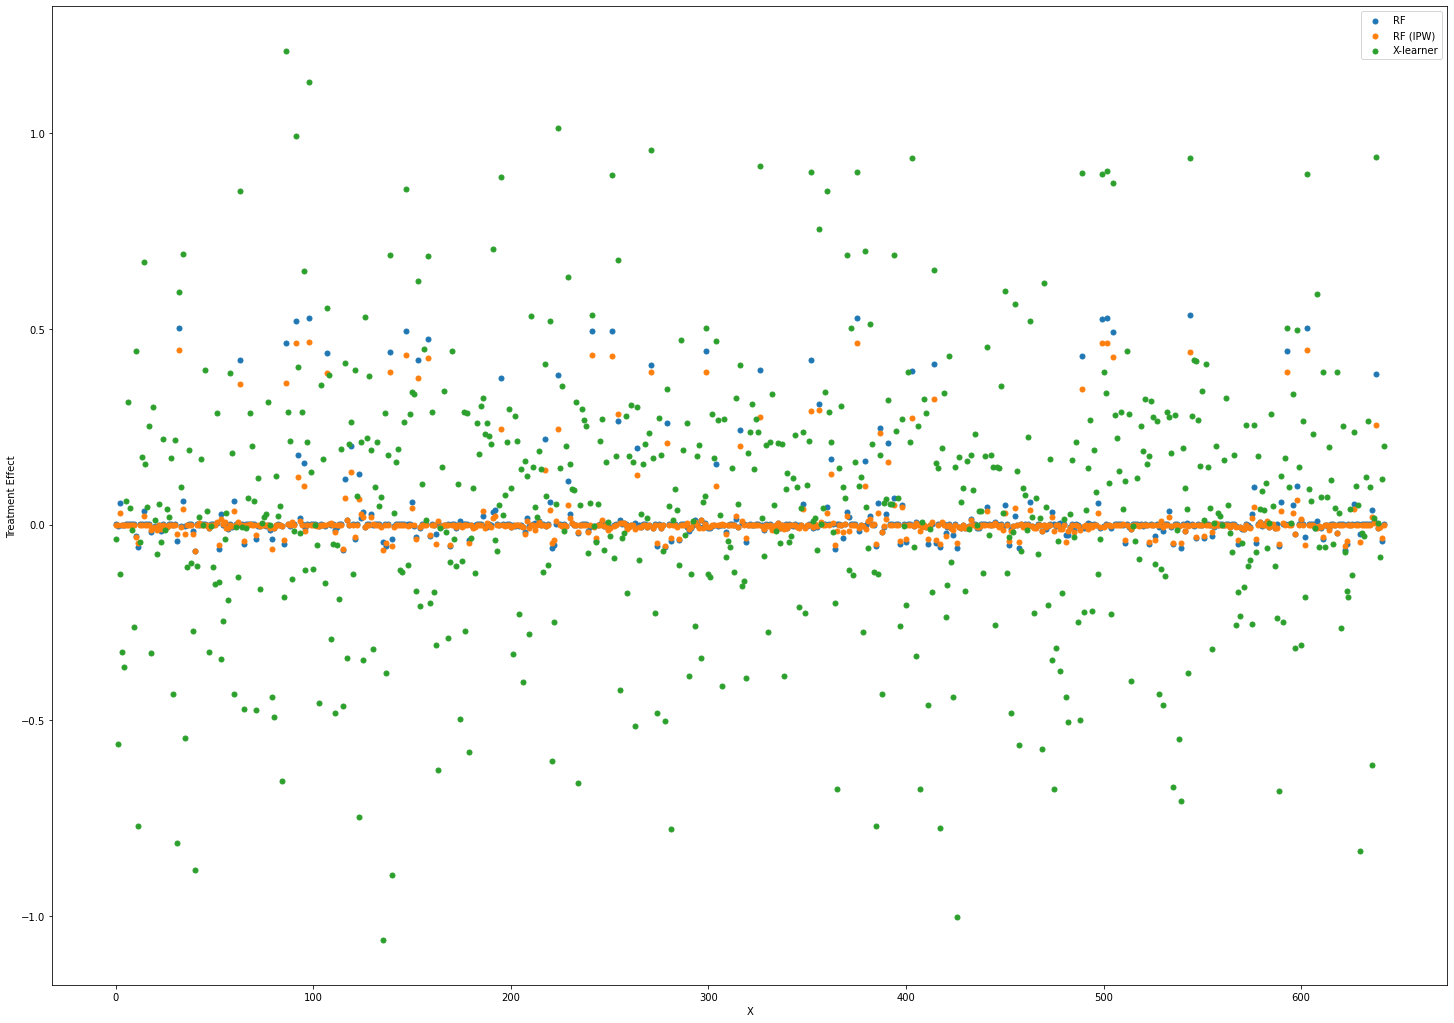

In [30]:
plt.figure(figsize=(25, 18))
m_size = 25
plt.scatter(range(x_test.shape[0]), rf_te_test, label="RF ", s=m_size)
plt.scatter(range(x_test.shape[0]), rf_ipsw_te_test, label="RF (IPW)", s=m_size)
plt.scatter(range(x_test.shape[0]), xl_te_test, label="X-learner", s=m_size)
plt.xlabel('X')
plt.ylabel('Treatment Effect')
plt.legend()
plt.show()